In [19]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import pathlib
import numpy as np
import pandas as pd
import os


In [20]:
main_dir="101_food_classes_10_percent"

In [21]:
for dirpath, dirnames, filenames in os.walk(main_dir):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 1 images in '101_food_classes_10_percent'.
There are 3 directories and 1 images in '101_food_classes_10_percent/test'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/fried_calamari'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/panna_cotta'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/caprese_salad'.
There are 3 directories and 1 images in '101_food_classes_10_percent/train'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/fried_calamari'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/panna_cotta'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/caprese_salad'.


In [22]:
data_dir = pathlib.Path("101_food_classes_10_percent/train/") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['.DS_Store' 'caprese_salad' 'fried_calamari' 'panna_cotta']


In [23]:
n = 14

l = []
arr = (n - 1, n + 29, (n + 59) % 100)
for i in range(len(class_names)):
    if i in arr:
        l.append(class_names[i])

print(l)

[]


Image shape: (512, 512, 3)


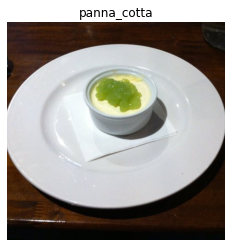

In [24]:
def view_random_image(target_dir, target_class):
      # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

  # View a random image from the training dataset
img = view_random_image(target_dir="101_food_classes_10_percent/train/",
                        target_class="panna_cotta")

In [25]:
img


array([[[44, 27, 33],
        [44, 27, 33],
        [44, 27, 33],
        ...,
        [21, 11,  9],
        [23, 13, 11],
        [25, 15, 13]],

       [[46, 29, 35],
        [46, 29, 35],
        [46, 29, 35],
        ...,
        [21, 11,  9],
        [23, 13, 11],
        [25, 15, 13]],

       [[44, 27, 33],
        [44, 27, 33],
        [43, 28, 33],
        ...,
        [22, 12, 10],
        [24, 14, 12],
        [25, 15, 13]],

       ...,

       [[ 3,  7,  8],
        [ 2,  6,  7],
        [ 1,  5,  4],
        ...,
        [ 4,  6,  3],
        [ 4,  6,  3],
        [ 4,  6,  1]],

       [[ 2,  6,  5],
        [ 1,  5,  4],
        [ 0,  4,  3],
        ...,
        [ 5,  7,  4],
        [ 5,  7,  4],
        [ 5,  7,  2]],

       [[ 1,  5,  4],
        [ 0,  4,  3],
        [ 0,  3,  2],
        ...,
        [ 5,  7,  4],
        [ 5,  7,  4],
        [ 5,  7,  2]]], dtype=uint8)

In [26]:
img/255.

array([[[0.17254902, 0.10588235, 0.12941176],
        [0.17254902, 0.10588235, 0.12941176],
        [0.17254902, 0.10588235, 0.12941176],
        ...,
        [0.08235294, 0.04313725, 0.03529412],
        [0.09019608, 0.05098039, 0.04313725],
        [0.09803922, 0.05882353, 0.05098039]],

       [[0.18039216, 0.11372549, 0.1372549 ],
        [0.18039216, 0.11372549, 0.1372549 ],
        [0.18039216, 0.11372549, 0.1372549 ],
        ...,
        [0.08235294, 0.04313725, 0.03529412],
        [0.09019608, 0.05098039, 0.04313725],
        [0.09803922, 0.05882353, 0.05098039]],

       [[0.17254902, 0.10588235, 0.12941176],
        [0.17254902, 0.10588235, 0.12941176],
        [0.16862745, 0.10980392, 0.12941176],
        ...,
        [0.08627451, 0.04705882, 0.03921569],
        [0.09411765, 0.05490196, 0.04705882],
        [0.09803922, 0.05882353, 0.05098039]],

       ...,

       [[0.01176471, 0.02745098, 0.03137255],
        [0.00784314, 0.02352941, 0.02745098],
        [0.00392157, 0

In [27]:
# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup the train and test directories
train_dir = main_dir+"/train/"
test_dir = main_dir+"/test/"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time 
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="sparse", # type of problem we're working on
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="sparse",
                                               seed=42)



model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10, 
                         kernel_size=3, # can also be (3, 3)
                         activation="relu", 
                         input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), # padding can also be 'same'
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="softmax")
])

# Compile the model
model_1.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=2,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 225 images belonging to 3 classes.
Found 750 images belonging to 3 classes.


2021-11-15 20:03:02.432308: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/2
8/8 [==============================] - 24s 3s/step - loss: 0.3120 - accuracy: 0.3333 - val_loss: -0.0744 - val_accuracy: 0.3333
Epoch 2/2
8/8 [==============================] - 31s 4s/step - loss: -0.1295 - accuracy: 0.3333 - val_loss: -0.2562 - val_accuracy: 0.3333


In [28]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

<AxesSubplot:title={'center':'History ins_model'}, xlabel='epochs', ylabel='loss'>

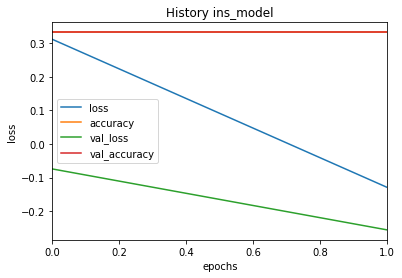

In [29]:
pd.DataFrame(history_1.history).plot(xlabel="epochs", 
ylabel="loss",title="History ins_model", xlim=(0,1))

In [30]:
def plot_loss_curves(history):
    """
    Returns separate loss curves for training and validation metrics.
    """ 
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    epochs = range(len(history.history['loss']))

    # Plot loss
    plt.plot(epochs, loss, label='training_loss')
    plt.plot(epochs, val_loss, label='val_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot accuracy
    plt.figure()
    plt.plot(epochs, accuracy, label='training_accuracy')
    plt.plot(epochs, val_accuracy, label='val_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();

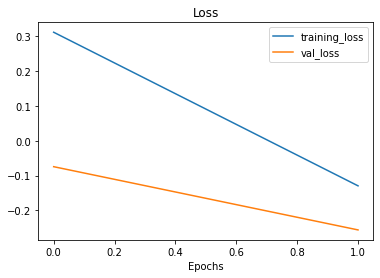

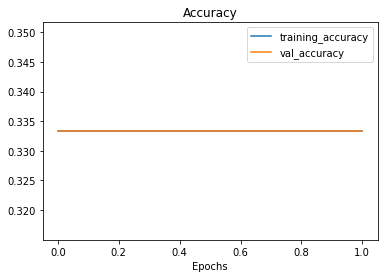

In [31]:
plot_loss_curves(history_1)

In [32]:
model_1.save('model1.h5')